In [1]:
from collections import Counter
import json
import os
import re

from matplotlib import font_manager, rc
from easydict import EasyDict as edict
from matplotlib import pyplot as plt
import pymysql as sql
import pandas as pd

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-3])
JSON_PATH = f'{ROOT_PATH}/utils/configs'

load_json = lambda path: json.loads(open(path, 'r').read())
CONFIGS   = edict(load_json(f'{JSON_PATH}/config.json'))
PORTS     = edict(load_json(f'{JSON_PATH}/ports.json'))

In [3]:
passwd    = CONFIGS.sql_passwd
host      = CONFIGS.global_host
user      = CONFIGS.sql_user
port      = PORTS.sql_port

font_path = '/usr/share/fonts/NanumMyeongjo.ttf'
font      = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [4]:
conn  = sql.connect(host = host, user = user, passwd = passwd,
                    port = port, db   = 'DoveNest')
query = 'select * from steam_info'
df    = pd.read_sql(query, conn)

conn.close()
df.info()

/tmp/ipykernel_9765/1152242253.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df    = pd.read_sql(query, conn)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178219 entries, 0 to 178218
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   idx        178219 non-null  int64 
 1   appid      178219 non-null  int64 
 2   title      178219 non-null  object
 3   thumbnail  178219 non-null  object
 4   genre      178219 non-null  object
 5   price      178219 non-null  object
 6   developer  178219 non-null  object
 7   publisher  178219 non-null  object
 8   windows    178219 non-null  int64 
 9   linux      178219 non-null  int64 
 10  mac        178219 non-null  int64 
 11  languages  178219 non-null  object
 12  date       178219 non-null  object
dtypes: int64(5), object(8)
memory usage: 17.7+ MB


In [5]:
def split_quater(date):

    date        = re.sub('월 [0-9]*일', '', date)
    year, month = date.split('년')
    month       = int(month.replace('월', ''))
    
    if   month in ( 1,  2,  3): quater = '1분기'
    elif month in ( 4,  5,  6): quater = '2분기'
    elif month in ( 7,  8,  9): quater = '3분기'
    elif month in (10, 11, 12): quater = '4분기'
    else: quater = pd.NA

    return f'{year}년 {quater}'


def merge_datas(column):

    merged_data = []
    for data in df[column]:

        merged_data.extend(data)

    return merged_data

In [6]:
df           = df.apply(lambda x: x.replace('N/A', pd.NA))
df           = df.apply(lambda x: x.replace(''   , pd.NA))
df           = df.dropna()

df.genre     =             df.genre.apply(lambda x: x.split(','))
df.languages =         df.languages.apply(lambda x: x.split(','))
df.developer = df.developer.apply(lambda x: x.lower().split(','))
df.publisher = df.publisher.apply(lambda x: x.lower().split(','))

df.date      = df.date.apply(split_quater)
df.sample(3).T

,76250,27983,95851
idx,80880,32613,100481
appid,1080420,2117780,1553880
title,Nyasha - Artbook 18+,RPG Maker MZ - Beast man Generator for MZ,Greats of the Gridiron
thumbnail,https://cdn.akamai.steamstatic.com/steam/apps/...,https://cdn.akamai.steamstatic.com/steam/apps/...,https://cdn.akamai.steamstatic.com/steam/apps/...
genre,"[캐주얼, 인디]","[RPG, 디자인과 일러스트레이션, 웹 퍼블리싱]","[시뮬레이션, 스포츠, 전략, 앞서 해보기]"
price,"₩ 2,200","₩ 15,500","₩ 26,000"
developer,[zloy krot studio],[gee-kun-soft],[critical density studios]
publisher,[ir studio],[komodo],[critical density studios]
windows,1,1,1
linux,0,0,0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83],
 [Text(0, 0, '2000년 4분기'),
  Text(1, 0, '2001년 1분기'),
  Text(2, 0, '2001년 2분기'),
  Text(3, 0, '2001년 4분기'),
  Text(4, 0, '2003년 2분기'),
  Text(5, 0, '2003년 3분기'),
  Text(6, 0, '2003년 4분기'),
  Text(7, 0, '2004년 1분기'),
  Text(8, 0, '2004년 2분기'),
  Text(9, 0, '2004년 4분기'),
  Text(10, 0, '2005년 2분기'),
  Text(11, 0, '2005년 3분기'),
  Text(12, 0, '2005년 4분기'),
  Text(13, 0, '2006년 1분기'),
  Text(14, 0, '2006년 2분기'),
  Text(15, 0, '2006년 3분기'),
  Text(16, 0, '2006년 4분기'),
  Text(17, 0, '2007년 1분기'),
  Text(18, 

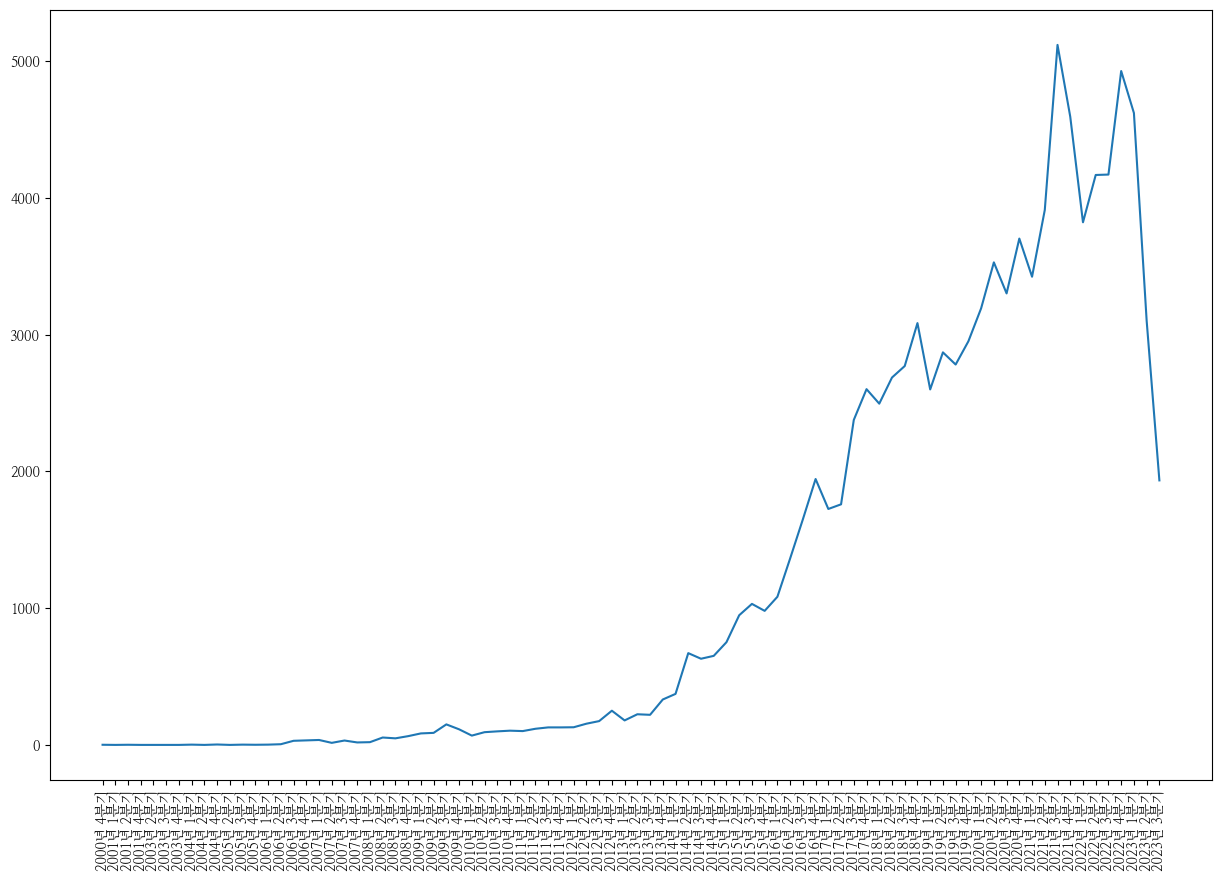

In [7]:
n_dates = df[df.date >= '2000년 1분기']
n_dates = dict(n_dates.date.value_counts())
n_dates = dict(sorted(n_dates.items())[:-1])

plt.figure(figsize = (15, 10))
plt.plot(n_dates.keys(), n_dates.values())
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [Text(0, 0, 'sokpop collective'),
  Text(1, 0, 'playground games'),
  Text(2, 0, 'gearbox software'),
  Text(3, 0, 'creative assembly'),
  Text(4, 0, 'capcom'),
  Text(5, 0, 'kokoro reflections'),
  Text(6, 0, 'dharker studio'),
  Text(7, 0, ' engine software bv'),
  Text(8, 0, 'taito corp.'),
  Text(9, 0, ' ph3 gmbh'),
  Text(10, 0, ' aspyr (mac)'),
  Text(11, 0, 'arc system works'),
  Text(12, 0, 'ayato sound create'),
  Text(13, 0, 'flat cat games'),
  Text(14, 0, 'games for pleasure'),
  Text(15, 0, 'ir studio'),
  Text(16, 0, 'relic entertainment'),
  Text(17, 0, 'scs software'),
  Text(18, 0, 'ilca'),
  Text(19, 0, 'colloseusx'),
  Text(20, 0, ' compile heart'),
  Text(21, 0, 'boogygames studios'),
  Text(22, 0, 'joe

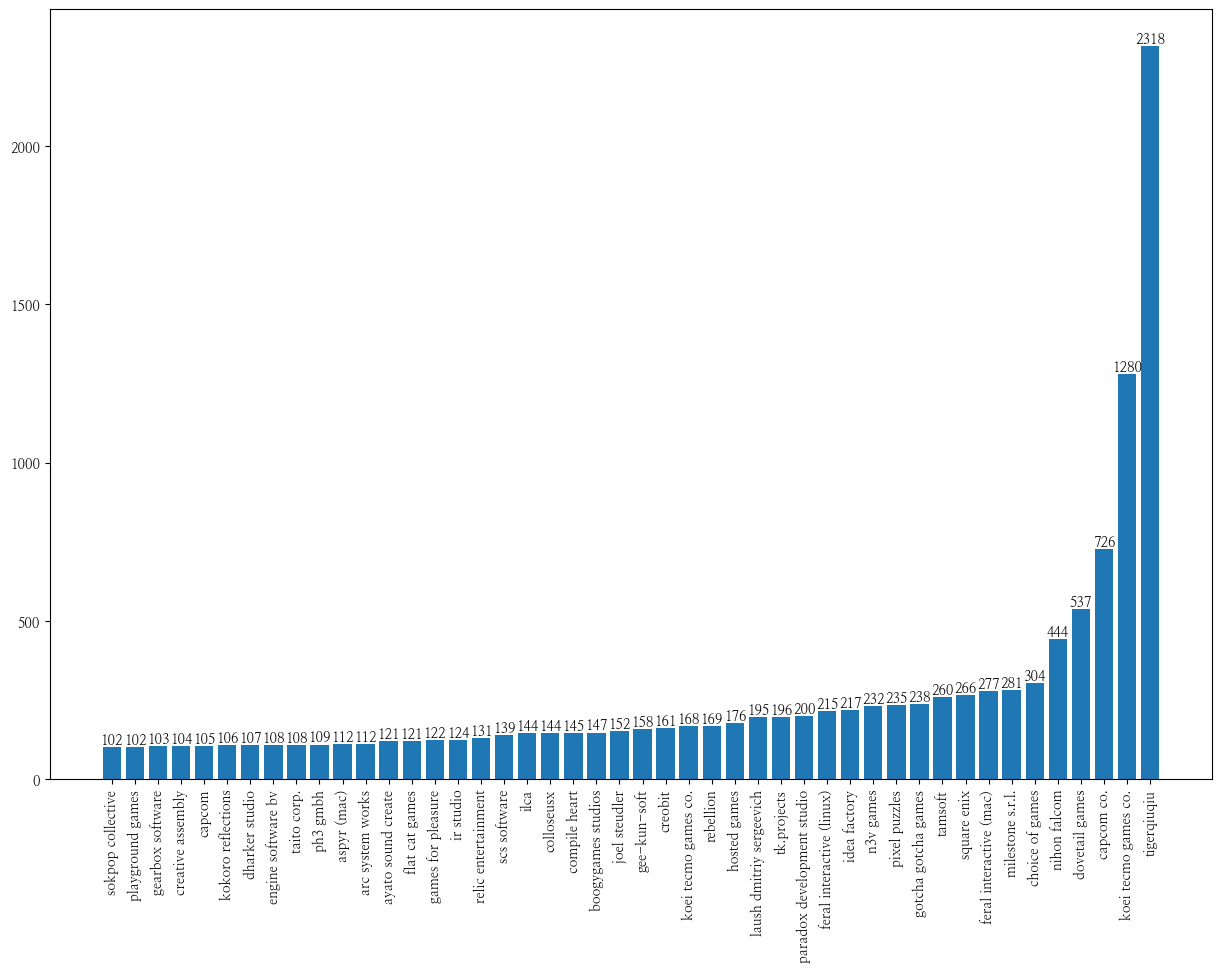

In [23]:
devs_cnt  = Counter(merge_datas('developer'))
condition = lambda x: ('ltd' not in x, 'inc' not in x, 'llc' not in x) 
devs_cnt  = {k : v for k,v in devs_cnt.items() if all(condition(k)) and (v >= 100)}
devs_cnt  = dict(sorted(devs_cnt.items(), key = lambda x: x[1]))

plt.figure(figsize = (15, 10))
plt.bar(devs_cnt.keys(), devs_cnt.values())
for k, v in devs_cnt.items():

    plt.text(k, v, v,
             ha = 'center', va = 'bottom')

plt.xticks(rotation = 90)